In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

# import naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# import select k best
from sklearn.feature_selection import SelectKBest
#import train_test_split
from sklearn.model_selection import train_test_split

#impor f1_score from sklearn.metrics
from sklearn.metrics import f1_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier


In [2]:
# read in data
train=pd.read_csv('/Users/srikarprayaga/Desktop/NW-Modeling-Assessment/TRAIN_SET_2021.csv')
test=pd.read_csv('/Users/srikarprayaga/Desktop/NW-Modeling-Assessment/TEST_SET_2021.csv')

## Data Cleaning and Preparation 

In [3]:
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,...,2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [4]:
# dimensions of the data before any preprocessing
train.shape

(15673, 28)

In [5]:
# columns in the data
train.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW'],
      dtype='object')

In [6]:
# check number of null values per column
train.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                 130
ADDRESS                              70
CITY                                236
STATE                               209
ZIP                                  59
CURRENT_DEMERITS                    216
CURRENT_GRADE                       308
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
INSPECTION_TIME                     183
INSPECTION_TYPE                     221
INSPECTION_DEMERITS                 254
VIOLATIONS_RAW                      165
RECORD_UPDATED                      119
LAT_LONG_RAW                         15
FIRST_VIOLATION                     212
SECOND_VIOLATION                     85
THIRD_VIOLATION                      61
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               267


In [7]:
# perentage of null values per column
train.isnull().sum()/train.shape[0]

RESTAURANT_SERIAL_NUMBER            0.000000
RESTAURANT_PERMIT_NUMBER            0.000000
RESTAURANT_NAME                     0.004147
RESTAURANT_LOCATION                 0.012761
RESTAURANT_CATEGORY                 0.008295
ADDRESS                             0.004466
CITY                                0.015058
STATE                               0.013335
ZIP                                 0.003764
CURRENT_DEMERITS                    0.013782
CURRENT_GRADE                       0.019652
EMPLOYEE_COUNT                      0.005934
MEDIAN_EMPLOYEE_AGE                 0.002169
MEDIAN_EMPLOYEE_TENURE              0.018950
INSPECTION_TIME                     0.011676
INSPECTION_TYPE                     0.014101
INSPECTION_DEMERITS                 0.016206
VIOLATIONS_RAW                      0.010528
RECORD_UPDATED                      0.007593
LAT_LONG_RAW                        0.000957
FIRST_VIOLATION                     0.013526
SECOND_VIOLATION                    0.005423
THIRD_VIOL

In [8]:
# drop all null value due to small percentage of overall data 
train.dropna(inplace=True)

In [9]:
# gets the number of null values per column (after dropping null values)
train.isnull().sum()

RESTAURANT_SERIAL_NUMBER            0
RESTAURANT_PERMIT_NUMBER            0
RESTAURANT_NAME                     0
RESTAURANT_LOCATION                 0
RESTAURANT_CATEGORY                 0
ADDRESS                             0
CITY                                0
STATE                               0
ZIP                                 0
CURRENT_DEMERITS                    0
CURRENT_GRADE                       0
EMPLOYEE_COUNT                      0
MEDIAN_EMPLOYEE_AGE                 0
MEDIAN_EMPLOYEE_TENURE              0
INSPECTION_TIME                     0
INSPECTION_TYPE                     0
INSPECTION_DEMERITS                 0
VIOLATIONS_RAW                      0
RECORD_UPDATED                      0
LAT_LONG_RAW                        0
FIRST_VIOLATION                     0
SECOND_VIOLATION                    0
THIRD_VIOLATION                     0
FIRST_VIOLATION_TYPE                0
SECOND_VIOLATION_TYPE               0
THIRD_VIOLATION_TYPE                0
NUMBER_OF_VI

In [10]:
# shape of the data after dropping null values
train.shape

(12083, 28)

In [11]:
# datatypes of all columns before transformation 
train.dtypes

RESTAURANT_SERIAL_NUMBER             object
RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                 float64
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                 

In [12]:
# assigning correct data types to columns  
train["RESTAURANT_SERIAL_NUMBER"]=train["RESTAURANT_SERIAL_NUMBER"].astype('str')
train['RESTAURANT_NAME'] = train['RESTAURANT_NAME'].astype('str')
train['RESTAURANT_LOCATION']=train['RESTAURANT_LOCATION'].astype('str')
train['RESTAURANT_CATEGORY']=train['RESTAURANT_CATEGORY'].astype('category')
train["ADDRESS"]=train["ADDRESS"].astype('str')
train['CITY']=train['CITY'].astype('str')
train["STATE"]=train["STATE"].astype('str')
train["ZIP"]=train["ZIP"].astype('str')
train["CURRENT_GRADE"]=train["CURRENT_GRADE"].astype('str')
train["EMPLOYEE_COUNT"]=train["EMPLOYEE_COUNT"].astype('int64')
train["MEDIAN_EMPLOYEE_AGE"]=train["MEDIAN_EMPLOYEE_AGE"].astype('int64')

# convert every / in INSPECTION_TIME to - and convert column to datetime
train['INSPECTION_TIME'] = train['INSPECTION_TIME'].astype('str')
train['INSPECTION_TIME'] = train['INSPECTION_TIME'].str.replace('/', '-')
train['INSPECTION_TIME'] = pd.to_datetime(train['INSPECTION_TIME'],errors='coerce')

# remove row in train with 'Routine Inspection' in INSPECTION_DEMERITS
train = train[train['INSPECTION_DEMERITS'] != 'Routine Inspection']
train['INSPECTION_DEMERITS'] = train['INSPECTION_DEMERITS'].astype('int64')

train['RECORD_UPDATED'] = train['RECORD_UPDATED'].astype('str')
train['RECORD_UPDATED'] = train['RECORD_UPDATED'].str.replace('/', '-')
train['RECORD_UPDATED'] = pd.to_datetime(train['RECORD_UPDATED'],errors='coerce')
train['RECORD_UPDATED'] = pd.to_datetime(train['RECORD_UPDATED'])


train['FIRST_VIOLATION']=train['FIRST_VIOLATION_TYPE'].astype('str')
train['SECOND_VIOLATION']=train['SECOND_VIOLATION_TYPE'].astype('str')
train['THIRD_VIOLATION']=train['THIRD_VIOLATION_TYPE'].astype('str')

train['FIRST_VIOLATION_TYPE']=train['FIRST_VIOLATION_TYPE'].astype('str')
train['SECOND_VIOLATION_TYPE']=train['SECOND_VIOLATION_TYPE'].astype('str')
train['THIRD_VIOLATION_TYPE']=train['THIRD_VIOLATION_TYPE'].astype('str')
train['THIRD_VIOLATION_TYPE']=train['THIRD_VIOLATION_TYPE'].astype('str')

train.drop(train[train['NUMBER_OF_VIOLATIONS'] == 'Nevada'].index, inplace=True)
train['NUMBER_OF_VIOLATIONS']=train['NUMBER_OF_VIOLATIONS'].astype('int64')

train.drop(train[train['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == '-3'].index, inplace=True)
train.drop(train[train['NEXT_INSPECTION_GRADE_C_OR_BELOW'] == 'Goat'].index, inplace=True)
train['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = train['NEXT_INSPECTION_GRADE_C_OR_BELOW'].astype('int64')



In [13]:
# same transformation for test data
test["RESTAURANT_SERIAL_NUMBER"]=test["RESTAURANT_SERIAL_NUMBER"].astype('str')
test['RESTAURANT_NAME'] = test['RESTAURANT_NAME'].astype('str')
test['RESTAURANT_LOCATION']=test['RESTAURANT_LOCATION'].astype('str')
test['RESTAURANT_CATEGORY']=test['RESTAURANT_CATEGORY'].astype('category')
test["ADDRESS"]=test["ADDRESS"].astype('str')
test['CITY']=test['CITY'].astype('str')
test["STATE"]=test["STATE"].astype('str')
test["ZIP"]=test["ZIP"].astype('str')
test["CURRENT_GRADE"]=test["CURRENT_GRADE"].astype('category')
test["EMPLOYEE_COUNT"]=test["EMPLOYEE_COUNT"].astype('int64')
test["MEDIAN_EMPLOYEE_AGE"]=test["MEDIAN_EMPLOYEE_AGE"].astype('int64')
# replace train with test
test['INSPECTION_TIME'] = test['INSPECTION_TIME'].astype('str')
test['INSPECTION_TIME'] = test['INSPECTION_TIME'].str.replace('/', '-')
test['INSPECTION_TIME'] = pd.to_datetime(train['INSPECTION_TIME'],errors='coerce')
test = test[test['INSPECTION_DEMERITS'] != 'Routine Inspection']
test['INSPECTION_DEMERITS'] = test['INSPECTION_DEMERITS'].astype('int64')

test['RECORD_UPDATED'] = test['RECORD_UPDATED'].astype('str')
test['RECORD_UPDATED'] = test['RECORD_UPDATED'].str.replace('/', '-')
test['RECORD_UPDATED'] = pd.to_datetime(train['RECORD_UPDATED'],errors='coerce')
test['RECORD_UPDATED'] = pd.to_datetime(train['RECORD_UPDATED'])

test['FIRST_VIOLATION']=test['FIRST_VIOLATION_TYPE'].astype('str')
test['SECOND_VIOLATION']=test['SECOND_VIOLATION_TYPE'].astype('str')
test['THIRD_VIOLATION']=test['THIRD_VIOLATION_TYPE'].astype('str')

test['FIRST_VIOLATION_TYPE']=test['FIRST_VIOLATION_TYPE'].astype('str')
test['SECOND_VIOLATION_TYPE']=test['SECOND_VIOLATION_TYPE'].astype('str')
test['THIRD_VIOLATION_TYPE']=test['THIRD_VIOLATION_TYPE'].astype('str')
test['THIRD_VIOLATION_TYPE']=test['THIRD_VIOLATION_TYPE'].astype('str')

test.drop(test[test['NUMBER_OF_VIOLATIONS'] == 'Nevada'].index, inplace=True)
test['NUMBER_OF_VIOLATIONS']=test['NUMBER_OF_VIOLATIONS'].astype('int64')




In [14]:
# datatypes after transformations 
train.dtypes

RESTAURANT_SERIAL_NUMBER                    object
RESTAURANT_PERMIT_NUMBER                    object
RESTAURANT_NAME                             object
RESTAURANT_LOCATION                         object
RESTAURANT_CATEGORY                       category
ADDRESS                                     object
CITY                                        object
STATE                                       object
ZIP                                         object
CURRENT_DEMERITS                           float64
CURRENT_GRADE                               object
EMPLOYEE_COUNT                               int64
MEDIAN_EMPLOYEE_AGE                          int64
MEDIAN_EMPLOYEE_TENURE                     float64
INSPECTION_TIME                     datetime64[ns]
INSPECTION_TYPE                             object
INSPECTION_DEMERITS                          int64
VIOLATIONS_RAW                              object
RECORD_UPDATED                      datetime64[ns]
LAT_LONG_RAW                   

In [15]:
# remove outliers from each column 

# remove whole row in train where value in STATE is 'SK', Star Trek', 'TT','Nevada?'
train = train[train['STATE'] != 'SK']
train = train[train['STATE'] != 'Star Trek']
train = train[train['STATE'] != 'TT']
train = train[train['STATE'] != 'Nevada?']
# replace NeVaDa with Nevada in train
train['STATE'] = train['STATE'].replace('NeVaDa', 'Nevada')

# remove whole row in train where value in CURRENT_GRADE is 'X', 'O','N', 'VPN', 'I', 'EIEIO','A+','7','.\<><1@#&|','U','K'
train = train[train['CURRENT_GRADE'] != 'X']
train = train[train['CURRENT_GRADE'] != 'O']
train = train[train['CURRENT_GRADE'] != 'N']
train = train[train['CURRENT_GRADE'] != 'VPN']
train = train[train['CURRENT_GRADE'] != 'I']
train = train[train['CURRENT_GRADE'] != 'EIEIO']
train = train[train['CURRENT_GRADE'] != 'A+']
train = train[train['CURRENT_GRADE'] != '7']
train = train[train['CURRENT_GRADE'] != '.\<><1@#&|']
train = train[train['CURRENT_GRADE'] != 'U']
train = train[train['CURRENT_GRADE'] != 'K']

# remove rows with 111447 and -7 from EMPLOYEE_COUNT in train
train = train[train['EMPLOYEE_COUNT'] != 111447]
train = train[train['EMPLOYEE_COUNT'] != -7]

# remove outlier ages in MEDIAN_EMPLOYEE_AGE using 3 sigma rule
# calculate mean and standard deviation
mean = train['MEDIAN_EMPLOYEE_AGE'].mean()
std = train['MEDIAN_EMPLOYEE_AGE'].std()
# calculate 3 sigma rule
threshold = mean + (3 * std)
# remove rows where MEDIAN_EMPLOYEE_AGE is greater than threshold
train = train[train['MEDIAN_EMPLOYEE_AGE'] <= threshold]

# remove the 7 and -7 from NEXT_INSPECTION_GRADE_C_OR_BELOW in train
train = train[train['NEXT_INSPECTION_GRADE_C_OR_BELOW'] != 7]
train = train[train['NEXT_INSPECTION_GRADE_C_OR_BELOW'] != -7]







In [16]:
# apply the same transformation to test data

# remove whole row in train where value in STATE is 'SK', Star Trek', 'TT','Nevada?'
test = test[test['STATE'] != 'SK']
test = test[test['STATE'] != 'Star Trek']
test = test[test['STATE'] != 'TT']
test = test[test['STATE'] != 'Nevada?']
# replace NeVaDa with Nevada in train
train['STATE'] = train['STATE'].replace('NeVaDa', 'Nevada')

# remove whole row in train where value in CURRENT_GRADE is 'X', 'O','N', 'VPN', 'I', 'EIEIO','A+','7','.\<><1@#&|','U','K'
test = test[test['CURRENT_GRADE'] != 'X']
test = test[test['CURRENT_GRADE'] != 'O']
test = test[test['CURRENT_GRADE'] != 'N']
test = test[test['CURRENT_GRADE'] != 'VPN']
test = test[test['CURRENT_GRADE'] != 'I']
test = test[test['CURRENT_GRADE'] != 'EIEIO']
test = test[test['CURRENT_GRADE'] != 'A+']
test = test[test['CURRENT_GRADE'] != '7']
test = test[test['CURRENT_GRADE'] != '.\<><1@#&|']
test = test[test['CURRENT_GRADE'] != 'U']
test = test[test['CURRENT_GRADE'] != 'K']

# remove rows with 111447 and -7 from EMPLOYEE_COUNT in train
test = test[test['EMPLOYEE_COUNT'] != 111447]
test = test[test['EMPLOYEE_COUNT'] != -7]

# remove outlier ages in MEDIAN_EMPLOYEE_AGE using 3 sigma rule
# calculate mean and standard deviation
mean = test['MEDIAN_EMPLOYEE_AGE'].mean()
std = test['MEDIAN_EMPLOYEE_AGE'].std()
# calculate 3 sigma rule
threshold = mean + (3 * std)
# remove rows where MEDIAN_EMPLOYEE_AGE is greater than threshold
test = test[test['MEDIAN_EMPLOYEE_AGE'] <= threshold]





In [17]:
# shape of train after prepreocessing
train.shape

(11948, 28)

## Exploratory Analysis

In [18]:
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,2015-01-06 16:34:00,"(36.1221442, 115.1652749)",Critical,Major,Imminent Health Hazard,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2013-02-21 22:26:00,"(36.218691, 115.242913)",Major,Major,Non-Major,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,2015-04-06 09:00:00,"(36.2498922, 115.2441383)",Critical,Major,Non-Major,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2013-02-21 22:26:00,"(36.183669, 115.112355)",Major,Non-Major,Non-Major,Major,Non-Major,Non-Major,3,0
5,DA1567561,PR0006724,Hotel Brendans Irish Pub,Orleans Hotel and Casino,Bar / Tavern,4500 W Tropicana Ave,Las Vegas,Nevada,89103-5420,3.0,...,2015-09-11 16:59:00,"(36.1027192, 115.201984)",Critical,Major,Major,Critical,Major,Major,7,0


(array([ 651.,  299.,  425.,  519.,  639., 1591.,  944.,  912.,  943.,
         910., 1560.,  674.,  522.,  430.,  315.,  386.,  100.,   64.,
          33.,   31.]),
 array([18. , 19.2, 20.4, 21.6, 22.8, 24. , 25.2, 26.4, 27.6, 28.8, 30. ,
        31.2, 32.4, 33.6, 34.8, 36. , 37.2, 38.4, 39.6, 40.8, 42. ]),
 <BarContainer object of 20 artists>)

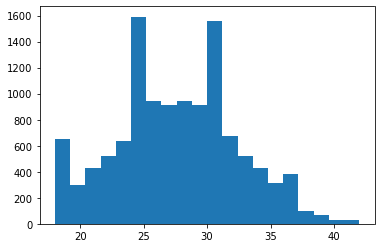

In [19]:
# plot the histogram of MEDIAN_EMPLOYEE_AGE
plt.hist(train['MEDIAN_EMPLOYEE_AGE'], bins=20)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    11948.000000
mean        27.527452
std          4.824830
min         18.000000
25%         24.000000
50%         27.000000
75%         31.000000
max         42.000000
Name: MEDIAN_EMPLOYEE_AGE, dtype: float64

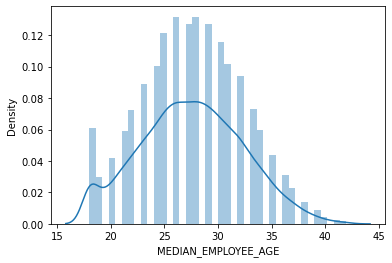

In [20]:
# #distribution of MEDIAN_EMPLOYEE_AGE after removing outliers in previous section 
sns.distplot(train['MEDIAN_EMPLOYEE_AGE'])
# print statistcs of MEDIAN_EMPLOYEE_AGE column to show how the different values make sense 
train['MEDIAN_EMPLOYEE_AGE'].describe()


<AxesSubplot:xlabel='CURRENT_GRADE', ylabel='INSPECTION_DEMERITS'>

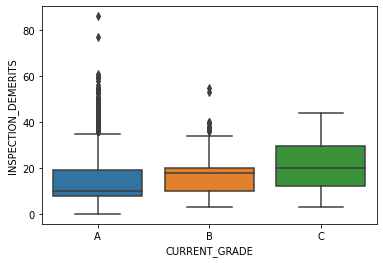

In [21]:
# plot current grade vs demerits
sns.boxplot(x='CURRENT_GRADE', y='INSPECTION_DEMERITS', data=train)


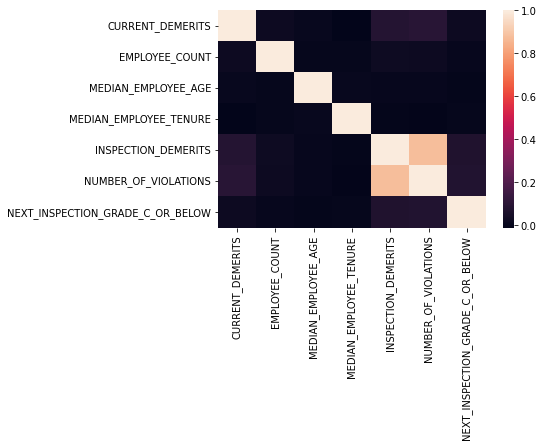

In [22]:
# identify if there is multicollinearity in the data 
# plot correlation matrix
corr = train.corr()
sns.heatmap(corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values)
plt.show()

## Feature Prep 

In [55]:
train.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,2015-01-06 16:34:00,"(36.1221442, 115.1652749)",Critical,Major,Imminent Health Hazard,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2013-02-21 22:26:00,"(36.218691, 115.242913)",Major,Major,Non-Major,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,2015-04-06 09:00:00,"(36.2498922, 115.2441383)",Critical,Major,Non-Major,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2013-02-21 22:26:00,"(36.183669, 115.112355)",Major,Non-Major,Non-Major,Major,Non-Major,Non-Major,3,0
5,DA1567561,PR0006724,Hotel Brendans Irish Pub,Orleans Hotel and Casino,Bar / Tavern,4500 W Tropicana Ave,Las Vegas,Nevada,89103-5420,3.0,...,2015-09-11 16:59:00,"(36.1027192, 115.201984)",Critical,Major,Major,Critical,Major,Major,7,0


In [63]:
'''label encode RESTAURANT_CATEGORY,CURRENT_GRADE,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,'FIRST_VIOLATION','SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE',
       '''
# label encode RESTAURANT_CATEGORY
le = LabelEncoder()
train['RESTAURANT_CATEGORY'] = le.fit_transform(train['RESTAURANT_CATEGORY'])
# label encode CURRENT_GRADE
le = LabelEncoder()
train['CURRENT_GRADE'] = le.fit_transform(train['CURRENT_GRADE'])
# label encode FIRST_VIOLATION
le = LabelEncoder()
train['FIRST_VIOLATION'] = le.fit_transform(train['FIRST_VIOLATION'])
# label encode SECOND_VIOLATION
le = LabelEncoder()
train['SECOND_VIOLATION'] = le.fit_transform(train['SECOND_VIOLATION'])
# label encode THIRD_VIOLATION
le = LabelEncoder() 
train['THIRD_VIOLATION'] = le.fit_transform(train['THIRD_VIOLATION'])
# label encode FIRST_VIOLATION_TYPE
le = LabelEncoder()
train['FIRST_VIOLATION_TYPE'] = le.fit_transform(train['FIRST_VIOLATION_TYPE'])
# label encode SECOND_VIOLATION_TYPE
le = LabelEncoder()
train['SECOND_VIOLATION_TYPE'] = le.fit_transform(train['SECOND_VIOLATION_TYPE'])
# label encode THIRD_VIOLATION_TYPE
le = LabelEncoder()
train['THIRD_VIOLATION_TYPE'] = le.fit_transform(train['THIRD_VIOLATION_TYPE'])
# label encode 'INSPECTION_TYPE'
le = LabelEncoder()
train['INSPECTION_TYPE'] = le.fit_transform(train['INSPECTION_TYPE'])


In [58]:
'''label encode RESTAURANT_CATEGORY,CURRENT_GRADE,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,'FIRST_VIOLATION','SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE' on the test set'''
# label encode RESTAURANT_CATEGORY
le=LabelEncoder()
test['RESTAURANT_CATEGORY']=le.fit_transform(test['RESTAURANT_CATEGORY'])
# label encode CURRENT_GRADE
le=LabelEncoder()
test['CURRENT_GRADE']=le.fit_transform(test['CURRENT_GRADE'])
# label encode FIRST_VIOLATION
le=LabelEncoder()
test['FIRST_VIOLATION']=le.fit_transform(test['FIRST_VIOLATION'])
# label encode SECOND_VIOLATION
le=LabelEncoder()
test['SECOND_VIOLATION']=le.fit_transform(test['SECOND_VIOLATION'])
# label encode THIRD_VIOLATION
le=LabelEncoder()
test['THIRD_VIOLATION']=le.fit_transform(test['THIRD_VIOLATION'])
# label encode FIRST_VIOLATION_TYPE
le=LabelEncoder()
test['FIRST_VIOLATION_TYPE']=le.fit_transform(test['FIRST_VIOLATION_TYPE'])
# label encode SECOND_VIOLATION_TYPE
le=LabelEncoder()
test['SECOND_VIOLATION_TYPE']=le.fit_transform(test['SECOND_VIOLATION_TYPE'])
# label encode THIRD_VIOLATION_TYPE
le=LabelEncoder()
test['THIRD_VIOLATION_TYPE']=le.fit_transform(test['THIRD_VIOLATION_TYPE'])
# label encode 'INSPECTION_TYPE'
le=LabelEncoder()
test['INSPECTION_TYPE']=le.fit_transform(test['INSPECTION_TYPE'])


## Model Building

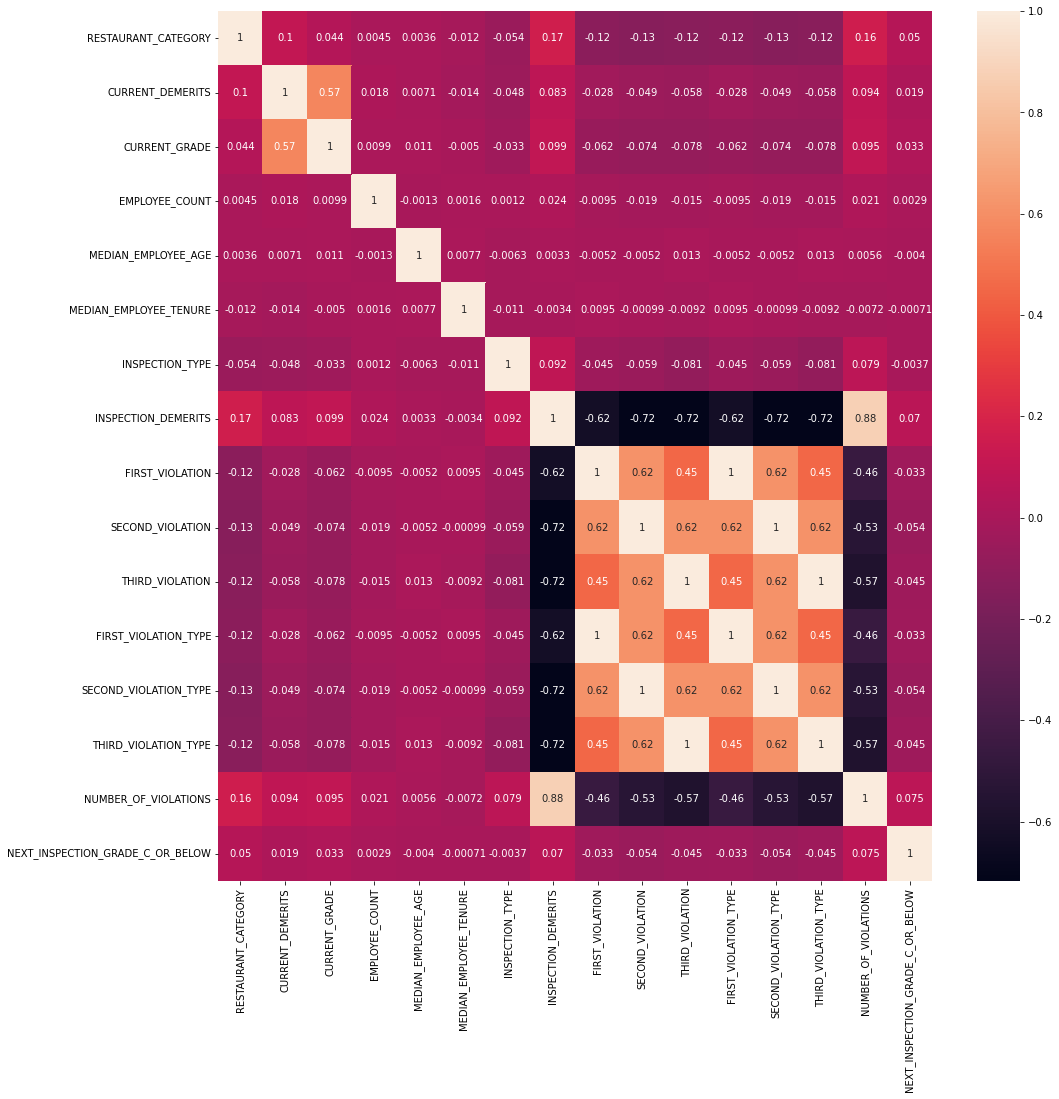

NEXT_INSPECTION_GRADE_C_OR_BELOW    1.000000
NUMBER_OF_VIOLATIONS                0.074742
INSPECTION_DEMERITS                 0.070482
RESTAURANT_CATEGORY                 0.050343
CURRENT_GRADE                       0.033035
CURRENT_DEMERITS                    0.019477
EMPLOYEE_COUNT                      0.002856
MEDIAN_EMPLOYEE_TENURE             -0.000712
INSPECTION_TYPE                    -0.003733
MEDIAN_EMPLOYEE_AGE                -0.004041
FIRST_VIOLATION_TYPE               -0.033067
FIRST_VIOLATION                    -0.033067
THIRD_VIOLATION_TYPE               -0.044506
THIRD_VIOLATION                    -0.044506
SECOND_VIOLATION_TYPE              -0.053593
SECOND_VIOLATION                   -0.053593
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, dtype: float64


In [112]:
# plot corelation heatmap with correlation values inside each box
corr = train.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr,  
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,annot=True)
plt.show()
# print correlation values in descending order of absolute value to NEXT_INSPECTION_GRADE_C_OR_BELOW
print(train.corr()['NEXT_INSPECTION_GRADE_C_OR_BELOW'].sort_values(ascending=False))




In [113]:
# split the train data into train and test with 'NEXT_INSPECTION_GRADE_C_OR_BELOW' as target
X_train, X_test, y_train, y_test = train_test_split(train.drop(['NEXT_INSPECTION_GRADE_C_OR_BELOW'], axis=1), train['NEXT_INSPECTION_GRADE_C_OR_BELOW'], test_size=0.2, random_state=42)
y_train

5357     0
9935     0
10639    1
11727    0
11430    0
        ..
14784    0
6827     0
7083     0
1135     0
9552     1
Name: NEXT_INSPECTION_GRADE_C_OR_BELOW, Length: 9558, dtype: int64

In [132]:
# run naive bayes on a couple columns using NEXT_INSPECTION_GRADE_C_OR_BELOW as target
# create a new dataframe with only the columns we want to use for prediction
X = X_train[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY','CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y = y_train
naive_bayes= GaussianNB()
naive_bayes.fit(X, y)
# accuracy of the model
print(naive_bayes.score(X, y))


0.8204645323289391


In [134]:
X=X_test[['NUMBER_OF_VIOLATIONS' ,'INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y=y_test
print(naive_bayes.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))


0.8430962343096234
0.040920716112531966


In [116]:
# logistic regression on a couple columns using NEXT_INSPECTION_GRADE_C_OR_BELOW as target
X = X_train[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT' ]]
y = y_train
logreg = LogisticRegression()
logreg.fit(X, y)
# accuracy of the model
print(logreg.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))


0.8363674408872149
0.1291547958214625


In [117]:
X=X_test[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y=y_test
print(logreg.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))

0.8585774058577406
0.10244988864142539


In [118]:

multinomial_nb = MultinomialNB()
X=X_train[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y=y_train
multinomial_nb.fit(X, y)
print(multinomial_nb.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))

0.8273697426239799
0.1291547958214625


In [119]:
X=X_test[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y=y_test
print(multinomial_nb.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))

0.8460251046025105
0.10244988864142539


bernoulli naive baye

In [120]:
bernoulli_nb = BernoulliNB()
X=X_train[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y=y_train
bernoulli_nb.fit(X, y)
print(bernoulli_nb.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))

0.8363674408872149
0.1291547958214625


In [121]:
X=X_test[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y=y_test
print(bernoulli_nb.score(X, y))
print(f1_score(y, naive_bayes.predict(X)))


0.8585774058577406
0.10244988864142539


random forest classifier

In [48]:
train.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW'],
      dtype='object')

In [127]:
# random forest import
from sklearn.ensemble import RandomForestClassifier
# random forest regression 
X = X_train[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]
y = y_train
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
print(rf.score(X, y))
print(f1_score(y, rf.predict(X)))

0.9563716258631513
0.8520752039730402


In [128]:
# run on test data
X=X_test[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']]    
y=y_test
print(rf.score(X, y))
print(f1_score(y, rf.predict(X)))

0.8167364016736401
0.07983193277310924


Prediction using the best moel with high accuracy and f1 score

In [131]:
# predict probabilities for the test data
probabilities = bernoulli_nb.predict_proba(test[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']])
# get only second column of probabilities
probabilities = probabilities[:, 1]
# create df with RESTAURANT_SERIAL_NUMBER and CLASSIFIER_PROBABILITY, and prediction as CLASSIFIER_PREDICTION
df = pd.DataFrame({'RESTAURANT_SERIAL_NUMBER': test['RESTAURANT_SERIAL_NUMBER'], 'CLASSIFIER_PROBABILITY': probabilities, 'CLASSIFIER_PREDICTION': bernoulli_nb.predict(test[['NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT']])})
# export to csv
df.to_csv('/Users/srikarprayaga/Desktop/predictions.csv', index=False)

0    5538
2    5196
3    1211
1       3
Name: FIRST_VIOLATION, dtype: int64

The training dataset was initially cleaned by dropping null values instead of imputation as they make up a very small portion of a much larger dataset. The columns were converted to the appropriate datatypes and then cleaned for outliers or mistyped labels. These labels were either removed or the data associated with mismatched types were assigned to the correct class. Numerical values were also cleaned using the 3 sigma rule to remove outlier values like in the case of Employee_Age where there were very young/old people who were not to be part of the data. The exploratory analysis attempts to identify underlying patterns by creating various plots with respect to the target variable. A correlation plot was used to identify multi colinear variables to be used in the feature selection process during model building. The data was further prepped by label encoding some categorical variables to be used in various models. A simple naive bayes model was initially to serve as a baseline and various other models were built on top of that with metrics for accuracy as well as f1 score to  measure the recall rate. The effectiveness of the model was evaluated based on how it predicted correct answers as well as the recall value which allowed us to identify that the Naive Bayes solution built on a Bernoulli distribution has the highest accuracy rate of 85 percent as well as the highest  f1 score. 

The features which proved to be optimal for the models include: 'NUMBER_OF_VIOLATIONS','INSPECTION_DEMERITS' , 'RESTAURANT_CATEGORY', 'CURRENT_GRADE' , 'CURRENT_DEMERITS' ,'EMPLOYEE_COUNT'. These variables show a relatively high correlation with the target variables which may have contributed to the higher accuracy rate. To better optimize the predictive power of the model the training dataset could potentially include more detailed attributes by  breaking down the rating system with labels to describe the reason for a low score. A wider range of locations could also be useful in creating a model which can be used to create substantiated generalizations. 
Using the available data a workable model could potentially be found since there are quite a few rows of data left over after the cleaning process and the analysis suggests that the variables provided can be good predictors of the target variable. 


In [136]:
!jupyter nbconvert --to html Solutions_Notebook.ipynb

[NbConvertApp] Converting notebook Solutions_Notebook.ipynb to html
[NbConvertApp] Writing 957013 bytes to Solutions_Notebook.html
